### Propuesta #1: Empezar que quiere hacer un video juego que venda mas de 100 mil de copias

*Link del primer dataset:* https://www.kaggle.com/datasets/beridzeg45/video-games

*Link del segundo dataset:* https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024

In [43]:
# General Imports
import pandas as pd
import numpy as np
import seaborn as sns

#### Carga de los archivos csv en memoria y limpieza del dataframe

In [44]:
# Archivo con la informacion de los video juegos
df_videogames = pd.read_csv('./datasets/all_video_games(cleaned).csv')
print(df_videogames.shape)
print(df_videogames.dtypes)
df_videogames.head(10)

(14055, 9)
Title                  object
Release Date           object
Developer              object
Publisher              object
Genres                 object
Product Rating         object
User Score            float64
User Ratings Count    float64
Platforms Info         object
dtype: object


,Title,Release Date,Developer,Publisher,Genres,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."
5,Guitar Hero III: Legends of Rock,10/28/2007,Neversoft Entertainment,RedOctane,Rhythm,Rated T For Teen,8.4,144.0,"[{'Platform': 'Wii', 'Platform Metascore': '86..."
6,Frantix: A Puzzle Adventure,9/19/2005,Killer Game,Sony Online Entertainment,Action Puzzle,Rated E For Everyone,NaN,NaN,"[{'Platform': 'PSP', 'Platform Metascore': '59..."
7,Xenoraid,11/8/2016,10tons,10tons,Vertical Shoot-'Em-Up,Rated E +10 For Everyone +10,6.2,6.0,"[{'Platform': 'PlayStation 4', 'Platform Metas..."
8,The Sims: Livin' Large,8/27/2000,Maxis,EA Games,Virtual Life,Rated T For Teen,7.7,20.0,"[{'Platform': 'PC', 'Platform Metascore': '82'..."
9,Retrovirus,11/16/2012,Cadenza,Cadenza,FPS,NaN,6.6,20.0,"[{'Platform': 'PC', 'Platform Metascore': '70'..."


In [45]:
nan_counts = df_videogames.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
Title                   21
Release Date            64
Developer              138
Publisher              138
Genres                  21
Product Rating        3050
User Score            2341
User Ratings Count    2756
Platforms Info           0
dtype: int64


In [46]:
# Se elimina la columna de Release Date, Platforms Info, Developer y User Rating Count (no aportan valor al estudio). 
# Para Genres, Publisher y Product Ratings se rellena con "Not Specified".

df_videogames_cleanned = df_videogames.drop(['Release Date','User Ratings Count','Platforms Info'], axis=1)
df_videogames_cleanned['Genres'] = df_videogames_cleanned['Genres'].fillna('Not Specified')
df_videogames_cleanned['Publisher'] = df_videogames_cleanned['Publisher'].fillna('Not Specified')
df_videogames_cleanned['Product Rating'] = df_videogames_cleanned['Product Rating'].fillna('Not Specified')
df_videogames_cleanned['User Score'] = df_videogames_cleanned['User Score'].fillna(df_videogames_cleanned['User Score'].median())

print(df_videogames_cleanned.shape)
df_videogames_cleanned.head(10)

(14055, 6)


,Title,Developer,Publisher,Genres,Product Rating,User Score
0,Ziggurat (2012),Action Button Entertainment,Freshuu Inc.,Action,Not Specified,6.9
1,4X4 EVO 2,Terminal Reality,Gathering,Auto Racing Sim,Rated E For Everyone,7.2
2,MotoGP 2 (2001),Namco,Namco,Auto Racing Sim,Rated E For Everyone,5.8
3,Gothic 3,Piranha Bytes,Aspyr,Western RPG,Rated T For Teen,7.5
4,Siege Survival: Gloria Victis,FishTankStudio,Black Eye Games,RPG,Not Specified,6.5
5,Guitar Hero III: Legends of Rock,Neversoft Entertainment,RedOctane,Rhythm,Rated T For Teen,8.4
6,Frantix: A Puzzle Adventure,Killer Game,Sony Online Entertainment,Action Puzzle,Rated E For Everyone,7.2
7,Xenoraid,10tons,10tons,Vertical Shoot-'Em-Up,Rated E +10 For Everyone +10,6.2
8,The Sims: Livin' Large,Maxis,EA Games,Virtual Life,Rated T For Teen,7.7
9,Retrovirus,Cadenza,Cadenza,FPS,Not Specified,6.6


In [47]:
nan_counts = df_videogames_cleanned.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
Title              21
Developer         138
Publisher           0
Genres              0
Product Rating      0
User Score          0
dtype: int64


In [48]:
# Eliminando los NaN en Title
df_videogames_info = df_videogames_cleanned.dropna()

nan_counts = df_videogames_info.isna().sum()
print(f'Number of NaN values per column:\n{nan_counts}\n')
print(f'Final shape:\n{df_videogames_info.shape}')

Number of NaN values per column:
Title             0
Developer         0
Publisher         0
Genres            0
Product Rating    0
User Score        0
dtype: int64

Final shape:
(13917, 6)


In [49]:
# Archivo con la informacion de las ventas de los video juegos
df_videogames_sales_raw = pd.read_csv('./datasets/vgchartz-2024.csv')
print(df_videogames_sales_raw.shape)
print(df_videogames_sales_raw.dtypes)
df_videogames_sales_raw.head(10)

(64016, 14)
img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
dtype: object


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


In [50]:
nan_counts = df_videogames_sales_raw.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [51]:
# Se elimina la columna de img, na_sales, jp_sales, pal_sales, other_sales, release_date, developer, critic_score y last_update
# Para console, genre, publisher se rellena con "Not Specified".

df_videogames_sales_cleanned = df_videogames_sales_raw.drop(['img','na_sales','jp_sales','pal_sales','other_sales','last_update', 'release_date', 'critic_score', 'developer'], axis=1)
df_videogames_sales_cleanned['console'] = df_videogames_sales_cleanned['console'].fillna('Not Specified')
df_videogames_sales_cleanned['genre'] = df_videogames_sales_cleanned['genre'].fillna('Not Specified')
df_videogames_sales_cleanned['publisher'] = df_videogames_sales_cleanned['publisher'].fillna('Not Specified')

print(df_videogames_sales_cleanned.shape)
df_videogames_sales_cleanned.head(10)

(64016, 5)


,title,console,genre,publisher,total_sales
0,Grand Theft Auto V,PS3,Action,Rockstar Games,20.32
1,Grand Theft Auto V,PS4,Action,Rockstar Games,19.39
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,16.15
3,Grand Theft Auto V,X360,Action,Rockstar Games,15.86
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,15.09
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,14.82
6,Call of Duty: Black Ops,X360,Shooter,Activision,14.74
7,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,13.94
8,Call of Duty: Black Ops II,X360,Shooter,Activision,13.86
9,Call of Duty: Black Ops II,PS3,Shooter,Activision,13.80


In [52]:
nan_counts = df_videogames_sales_cleanned.isna().sum()
print(f"Number of NaN values per column:\n{nan_counts}")

Number of NaN values per column:
title              0
console            0
genre              0
publisher          0
total_sales    45094
dtype: int64


In [53]:
# Eliminando los NaN en total_sales
df_videogames_sales = df_videogames_sales_cleanned.dropna()

nan_counts = df_videogames_sales.isna().sum()
print(f'Number of NaN values per column:\n{nan_counts}\n')
print(f'Final shape:\n{df_videogames_sales.shape}')

Number of NaN values per column:
title          0
console        0
genre          0
publisher      0
total_sales    0
dtype: int64

Final shape:
(18922, 5)


#### Analisis estadistico de los datraframes

Empezando por la informacion general de los video juegos:

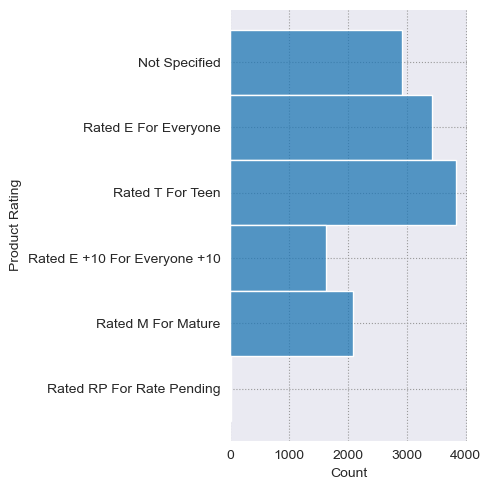

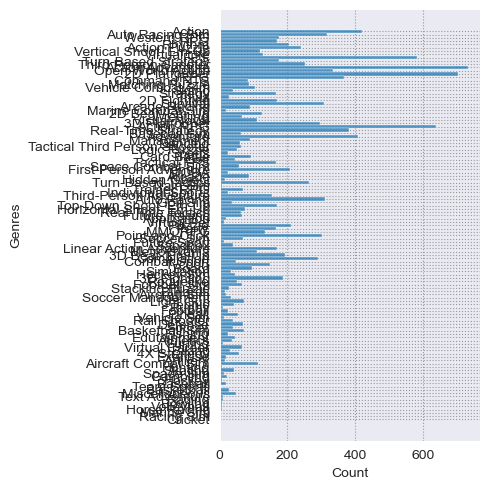

In [54]:
# Estilo de Seaborn
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Histogramas de la informacion de los video juegos
sns.displot(data=df_videogames_info, y='Product Rating')
sns.displot(data=df_videogames_info, y='Genres')

In [55]:
# Contando la cantidad de datos por Genre, Publisher y Developer
data_per_genre = df_videogames_info['Genres'].nunique()

print(f'Occurrences of each unique value per column:\n{data_per_genre}')


Occurrences of each unique value per column:
119


Analizando las ventas:

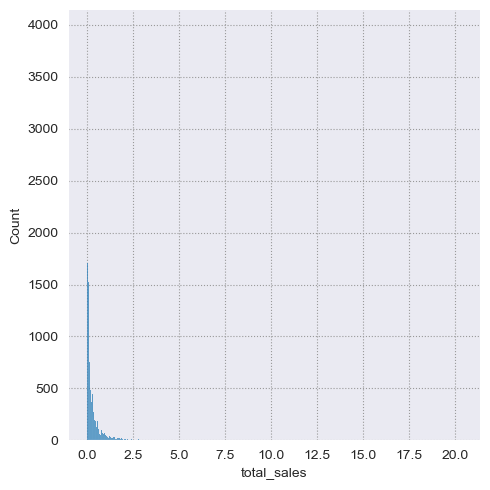

In [56]:
sns.displot(data=df_videogames_sales, x='total_sales')

In [57]:
# Eliminando los datos mayores a 1 millones
df_videogames_sales_target = df_videogames_sales[df_videogames_sales['total_sales'] <= 1]
print(df_videogames_sales_target.shape)
df_videogames_sales_target.head(10)

(17439, 5)


,title,console,genre,publisher,total_sales
1483,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,Sports,Konami,1.0
1484,PES 2009: Pro Evolution Soccer,X360,Sports,Konami,1.0
1485,NFL GameDay 2001,PS,Sports,Sony Computer Entertainment,1.0
1486,NBA Live 97,PS,Sports,EA Sports,1.0
1487,Excitebike 64,N64,Racing,Nintendo,1.0
1488,Dynasty Warriors 3: Xtreme Legends,PS2,Action,KOEI,1.0
1489,Far Cry: Primal,XOne,Action-Adventure,Ubisoft,1.0
1490,Rayman Origins,PS3,Platform,Ubisoft,1.0
1491,Breath of Fire III,PS,Role-Playing,Capcom,1.0
1492,Road & Track Presents: The Need for Speed,PS,Racing,Electronic Arts,1.0


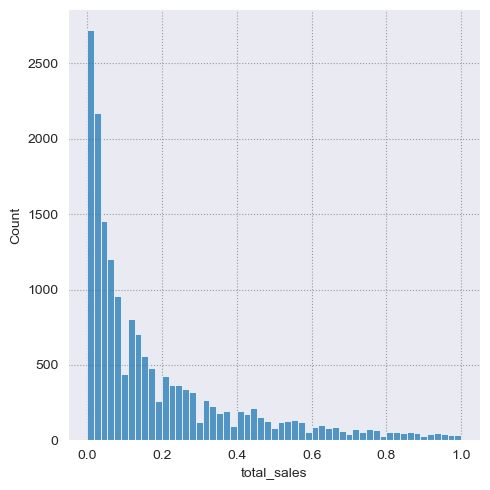

In [58]:
sns.displot(data=df_videogames_sales_target, x='total_sales')

In [59]:
# Anadiendo la columna si supera los $400k en ventas
df_videogames_sales_target['sell_100k_copies'] = np.where(df_videogames_sales_target['total_sales'] > 0.1, 'Yes', 'No')
print(df_videogames_sales_target.shape)
df_videogames_sales_target.head(10)

(17439, 6)


C:\Users\yoksa\AppData\Local\Temp\ipykernel_13048\2186932870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videogames_sales_target['sell_100k_copies'] = np.where(df_videogames_sales_target['total_sales'] > 0.1, 'Yes', 'No')


,title,console,genre,publisher,total_sales,sell_100k_copies
1483,Winning Eleven: Pro Evolution Soccer 2007 (All...,X360,Sports,Konami,1.0,Yes
1484,PES 2009: Pro Evolution Soccer,X360,Sports,Konami,1.0,Yes
1485,NFL GameDay 2001,PS,Sports,Sony Computer Entertainment,1.0,Yes
1486,NBA Live 97,PS,Sports,EA Sports,1.0,Yes
1487,Excitebike 64,N64,Racing,Nintendo,1.0,Yes
1488,Dynasty Warriors 3: Xtreme Legends,PS2,Action,KOEI,1.0,Yes
1489,Far Cry: Primal,XOne,Action-Adventure,Ubisoft,1.0,Yes
1490,Rayman Origins,PS3,Platform,Ubisoft,1.0,Yes
1491,Breath of Fire III,PS,Role-Playing,Capcom,1.0,Yes
1492,Road & Track Presents: The Need for Speed,PS,Racing,Electronic Arts,1.0,Yes


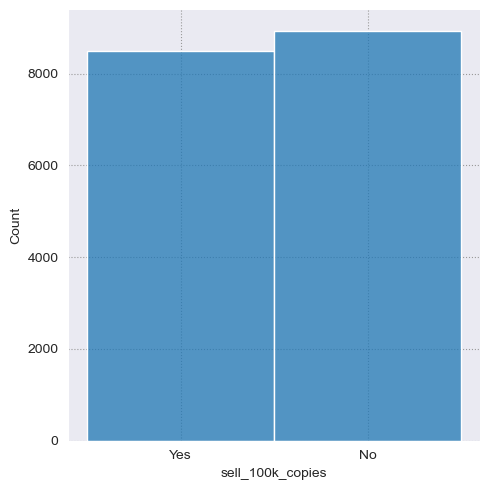

In [60]:
sns.displot(data=df_videogames_sales_target, x='sell_100k_copies')

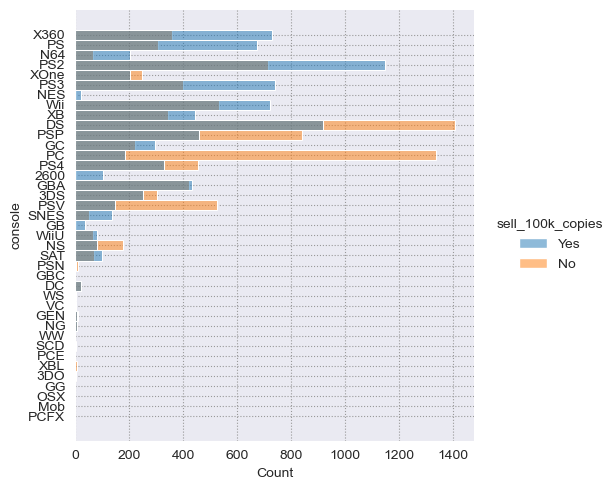

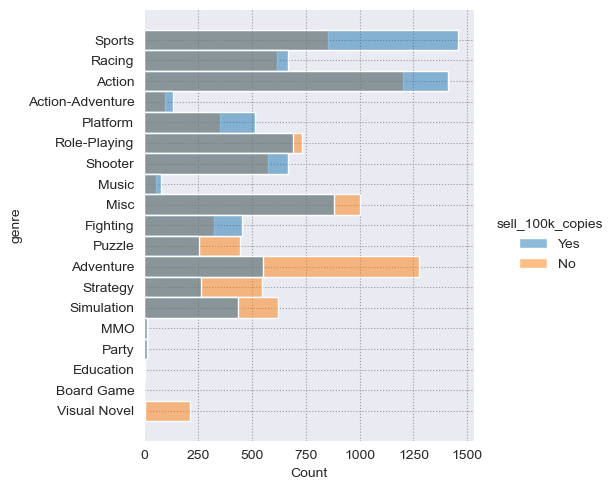

In [61]:
sns.displot(data=df_videogames_sales_target, y='console', hue='sell_100k_copies')
sns.displot(data=df_videogames_sales_target, y='genre', hue='sell_100k_copies')

In [62]:
# Contando la cantidad de datos por Genre, Publisher y Developer
count_publisher = df_videogames_sales_target['publisher'].nunique()

print(f'Occurrences of each unique value per column:\n{count_publisher}')

Occurrences of each unique value per column:
733
